In [1]:
import numpy as np 

from scipy.integrate import solve_ivp

import pde

import matplotlib as mpl
import matplotlib.pyplot as plt 

from haar import haar as haar1

from haar import haar
from pi2 import pi2 
from pi1 import pi1

from scipy import integrate


mpl.style.use('seaborn')

In [5]:
def wavelet_solve_maspring(J): 
    N = 2**(J + 1) 
    j = np.arange(0, N)
    x = (j - 0.5) / N

    alpha1 = 10.
    beta1 = 0.
    a1 = beta1 - alpha1 

    W = np.zeros((N, N)) 
    f = np.zeros((N, )) 
    a = np.zeros((N, ))

    eps = 1e-6
    gradepstol = 1e-3
    r = np.ones((N, 1))

    iter_idx = 0 

    while max(r) > eps: 
        #for j in range(N): 
        #    H = P1 = P2 = 0 
        H = np.zeros((N, ))
        P1 = np.zeros((N, ))
        P2 = np.zeros((N, ))

        for i in range(N): 
            H += a[i] * haar(x, i+1, J) 
            P1 += a[i] * pi1(x, i+1, J)             
            P2 += a[i] * pi2(x, i+1, J) 

        #print(H.shape, P1.shape, P2.shape)
        #print(f.shape)
        #f = n * (alpha1 + beta1 * x + P2) * (beta1 + P1) + H 
        f  = 1001 * (beta1 + P1) + 1000*(alpha1+beta1*x + P2) + H 
        #print(f.shape)

        for k in range(N): 
            #W[:, k] = n * pi2(x, k+1, J) * (beta1 + P1) + n * (alpha1 + beta1 + x + P2) * pi1(x, k+1, J)  + haar(x, k+1, J)
            W[:, k] = 1001 * pi2(x, k+1, J) * (beta1 + P1) + 1000 * (alpha1 + beta1 + x + P2) * pi1(x, k+1, J)  + haar(x, k+1, J)

        #print(W.shape, (W@a).shape, f.shape)
        a_new = np.linalg.pinv(W) @ (W@a - f)
        #print(np.linalg.pinv(W).shape, (W@a - f).shape)
        #print(a_new.shape)
        #a_new = lstsq(W, W@a - f, cond=None)[0]
        #a_new = solve(W, W@a - f) # singularities 
        #a_new = scipy.linalg.inv(W) @ (W@a - f)
        #print(a_new.shape)
        r = np.abs(a_new - a) 
        #print(r.shape)
        print(max(r)) 

        a = a_new 
        iter_idx += 1


    y = np.zeros((N, ))
    S = np.zeros((N, ))

    for i in range(N): 
        S += a[i] * pi2(x, i+1, J)

    y = alpha1 + x * beta1 + S 

    return y, x


In [11]:
def L2_error(approx, exact): 
    return np.sqrt(1 / len(approx) * np.sum((exact-approx)**2)) 

In [21]:
stest, stestx = wavelet_solve_maspring(7)


463.3569960778053
376.2699175509564
304.6686046592806
245.90310037381505
197.76279912289647
158.4059528629623
126.29999662850332
100.17115661029356
78.96198711184115
61.795655095202164
57.219627557929925
53.45275590255915
48.606571144739064
43.243680918245445
37.75716065803681
32.412698173593526
27.381318575722617
22.76464656911412
18.61428029111812
16.261176384691225
14.924773583805177
13.630466348961932
12.39119016617849
11.216181905358212
10.111569210142534
9.08090856818751
8.125666812199825
7.245644770910417
6.439344487071253
5.704283166265554
5.037258067566768
4.43456708763631
3.892189973730183
3.4059350362908845
2.9715560051097327
2.5848433454351607
2.2416939668046325
1.9381628509511302
1.7680812766047893
1.6638086910024867
1.5530466510572296
1.4394612105788838
1.3259007410688355
1.214532922656872
1.106963602880569
1.004339106808402
0.907433639973533
0.8167234191769239
0.7324490914088528
0.6546679175899044
0.5832970699611906
0.5181492789433833
0.4589619338494231
0.405420619241340

In [53]:
#exactmass = lambda x : 10 * np.exp(-1000 * x) * (1000 * np.exp(999*x) - 1) / 999 
exactmass = lambda x : 10 * (- 1/999 * np.exp(-1000*x) + 1000/999 * np.exp(-x))

def _intmaspring(t, Y): 
    return [Y[1], - 1000 * Y[0] - 1001 * Y[1]]

res = integrate.solve_ivp(_intmaspring, t_span=[min(stestx), max(stestx)],y0=[10, 0], method='Radau') # , method='Radau'


Text(0.5, 1.0, "Solution of \n$y''(x) + 1001 y'(x) + 1000y(x) = 0, y(0) = 10, y'(0) = 0$")

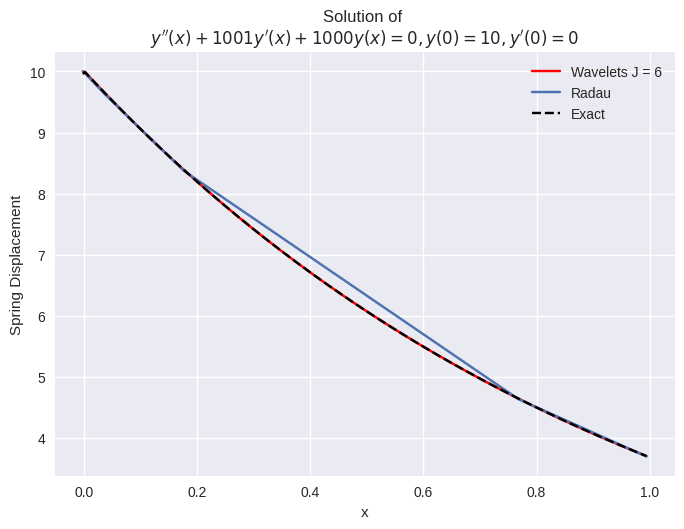

In [58]:
plt.plot(stestx, stest, 'r', label='Wavelets J = 6')
plt.plot(res.t, res.y[0, :], label="Radau") 
plt.plot(stestx, exactmass(stestx), 'k--', label="Exact")
plt.legend()
plt.xlabel('x')
plt.ylabel('Spring Displacement')
plt.title("Solution of " + '\n' + rf"$y''(x) + 1001 y'(x) + 1000y(x) = 0, y(0) = 10, y'(0) = 0$")



In [46]:
res.t.shape, stestx.shape

((256,), (256,))

In [50]:
L2_error(stest, exactmass(stestx)), L2_error( res.y[0, :], exactmass(res.t))

(0.0025785231177301374, 0.01308187119936477)

In [14]:
stestx.shape

(64,)

In [15]:
exactmass(stestx)

/tmp/ipykernel_193427/3915229269.py:1: RuntimeWarning: overflow encountered in exp
  exactmass = lambda x : 10 * np.exp(-1000 * x) * (1000 * np.exp(999*x) - 1) / 999
/tmp/ipykernel_193427/3915229269.py:1: RuntimeWarning: invalid value encountered in multiply
  exactmass = lambda x : 10 * np.exp(-1000 * x) * (1000 * np.exp(999*x) - 1) / 999


array([-14.64922797,   9.93210744,   9.77812838,   9.62653255,
         9.47728699,   9.33035528,   9.18570153,   9.04329043,
         8.9030872 ,   8.76505763,   8.62916801,   8.49538516,
         8.36367642,   8.23400963,   8.10635315,   7.98067579,
         7.85694688,   7.73513621,   7.61521404,   7.49715109,
         7.38091853,   7.266488  ,   7.15383154,   7.04292167,
         6.93373129,   6.82623375,   6.7204028 ,   6.61621261,
         6.51363774,   6.41265315,   6.31323418,   6.21535655,
         6.11899638,   6.02413014,   5.93073466,   5.83878714,
         5.74826513,   5.65914654,   5.57140961,   5.48503291,
         5.39999535,   5.31627619,   5.23385496,   5.15271156,
         5.07282618,   4.9941793 ,          inf,          inf,
                inf,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,       